In [1]:
#Importing necessary libraries:
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import statsmodels.api as sm


from scipy.stats import ttest_1samp, ttest_ind
from statsmodels.stats.anova import _get_covariance,anova_lm 
from statsmodels.formula.api import ols
from scipy.stats import shapiro
from scipy.stats import norm
%matplotlib inline

### #Problem 1 :

The Student News Service at Clear Mountain State University (CMSU) has decided to gather data about the undergraduate students that attend CMSU. CMSU creates and distributes a survey of 14 questions and receives responses from 62 undergraduates (stored in the Survey data set).

#### #1.1. For this data, construct the following contingency tables (Keep Gender as row variable)

In [2]:
#Importing CSV file to notebook
df_survey = pd.read_csv('Survey.csv')

In [3]:
#Basic view of the dataset
df_survey.head()

,ID,Gender,Age,Class,Major,Grad Intention,GPA,Employment,Salary,Social Networking,Satisfaction,Spending,Computer,Text Messages
0,1,Female,20,Junior,Other,Yes,2.9,Full-Time,50.0,1,3,350,Laptop,200
1,2,Male,23,Senior,Management,Yes,3.6,Part-Time,25.0,1,4,360,Laptop,50
2,3,Male,21,Junior,Other,Yes,2.5,Part-Time,45.0,2,4,600,Laptop,200
3,4,Male,21,Junior,CIS,Yes,2.5,Full-Time,40.0,4,6,600,Laptop,250
4,5,Male,23,Senior,Other,Undecided,2.8,Unemployed,40.0,2,4,500,Laptop,100


In [4]:
#Null Checks :
df_survey.isnull().sum()

ID                   0
Gender               0
Age                  0
Class                0
Major                0
Grad Intention       0
GPA                  0
Employment           0
Salary               0
Social Networking    0
Satisfaction         0
Spending             0
Computer             0
Text Messages        0
dtype: int64

#### 1.1.1. Gender and Major

In [5]:
#contingency table(s) for Gender and Major :
ct=pd.crosstab(df_survey['Gender'],df_survey['Major'])
ct

Major,Accounting,CIS,Economics/Finance,International Business,Management,Other,Retailing/Marketing,Undecided
Gender,,,,,,,,
Female,3,3,7,4,4,3,9,0
Male,4,1,4,2,6,4,5,3


#### 1.1.2. Gender and Grad Intention

In [6]:
#contingency table(s) for Gender and Grad Intention :
ct_1=pd.crosstab(df_survey['Gender'],df_survey['Grad Intention'])
ct_1

Grad Intention,No,Undecided,Yes
Gender,,,
Female,9,13,11
Male,3,9,17


#### 1.1.3. Gender and Employment

In [7]:
#contingency table(s) for Gender and Employment :
ct_2=pd.crosstab(df_survey['Gender'],df_survey['Employment'])
ct_2

Employment,Full-Time,Part-Time,Unemployed
Gender,,,
Female,3,24,6
Male,7,19,3


#### 1.1.4. Gender and Computer

In [8]:
#contingency table(s) for Gender and Computer :
ct_3=pd.crosstab(df_survey['Gender'],df_survey['Computer'])
ct_3

Computer,Desktop,Laptop,Tablet
Gender,,,
Female,2,29,2
Male,3,26,0


#### #1.2. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:
#### 1.2.1. What is the probability that a randomly selected CMSU student will be male?

In [9]:
#Value counts for Gender
df_survey.Gender.value_counts()

Female    33
Male      29
Name: Gender, dtype: int64

In [10]:
total=len(df_survey['Gender'])
print('Total no. of students :',total)
print ("Probability that a randomly selected CMSU student will be male = ",(29/total)*100,'%' )

Total no. of students : 62
Probability that a randomly selected CMSU student will be male =  46.774193548387096 %


#### 1.2.2. What is the probability that a randomly selected CMSU student will be female?

In [11]:
print('Total no. of students :',total)
print ("Probability that a randomly selected CMSU student will be male = ",(33/total)*100,'%' )

Total no. of students : 62
Probability that a randomly selected CMSU student will be male =  53.2258064516129 %


#### #1.3. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 1.3.1. Find the conditional probability of different majors among the male students in CMSU.

In [12]:
#Crosstab for Gender vs. Major
survey_data = pd.crosstab(index=df_survey['Gender'], columns=df_survey['Major'], margins=True, normalize='index',dropna=True)

In [13]:
print('Probability of Males opting for Accounting. is :',((survey_data.iloc[1, 0])*100),'%')
print('Probability of Males opting for CIS. is :',((survey_data.iloc[1, 1])*100),'%')
print('Probability of Males opting for Economics/Finance.. is :',((survey_data.iloc[1, 2])*100),'%')
print('Probability of Males opting for InternationalBusiness. is :',((survey_data.iloc[1, 3])*100),'%')
print('Probability of Males opting for Management. is :',((survey_data.iloc[1, 4])*100),'%')
print('Probability of Males opting for Other. is :',((survey_data.iloc[1, 5])*100),'%')
print('Probability of Males opting for Retailing/Marketing. is :',((survey_data.iloc[1, 6])*100),'%')
print('Probability of Males opting for Undecided. is :',((survey_data.iloc[1, 7])*100),'%')

Probability of Males opting for Accounting. is : 13.793103448275861 %
Probability of Males opting for CIS. is : 3.4482758620689653 %
Probability of Males opting for Economics/Finance.. is : 13.793103448275861 %
Probability of Males opting for InternationalBusiness. is : 6.896551724137931 %
Probability of Males opting for Management. is : 20.689655172413794 %
Probability of Males opting for Other. is : 13.793103448275861 %
Probability of Males opting for Retailing/Marketing. is : 17.24137931034483 %
Probability of Males opting for Undecided. is : 10.344827586206897 %


#### 1.3.2 Find the conditional probability of different majors among the female students of CMSU.

In [14]:
print('Probability of Females  opting for Accounting. is :',((survey_data.iloc[0, 0])*100),'%')
print('Probability of Females  opting for CIS. is :',((survey_data.iloc[0, 1])*100),'%')
print('Probability of Females  opting for Economics/Finance.. is :',((survey_data.iloc[0, 2])*100),'%')
print('Probability of Females  opting for InternationalBusiness. is :',((survey_data.iloc[0, 3])*100),'%')
print('Probability of Females  opting for Management. is :',((survey_data.iloc[0, 4])*100),'%')
print('Probability of Females  opting for Other. is :',((survey_data.iloc[0, 5])*100),'%')
print('Probability of Females  opting for Retailing/Marketing. is :',((survey_data.iloc[0, 6])*100),'%')
print('Probability of Females  opting for Undecided. is :',((survey_data.iloc[0, 7])*100),'%')

Probability of Females  opting for Accounting. is : 9.090909090909092 %
Probability of Females  opting for CIS. is : 9.090909090909092 %
Probability of Females  opting for Economics/Finance.. is : 21.21212121212121 %
Probability of Females  opting for InternationalBusiness. is : 12.121212121212121 %
Probability of Females  opting for Management. is : 12.121212121212121 %
Probability of Females  opting for Other. is : 9.090909090909092 %
Probability of Females  opting for Retailing/Marketing. is : 27.27272727272727 %
Probability of Females  opting for Undecided. is : 0.0 %


#### 1.4.1. Find the probability That a randomly chosen student is a male and intends to graduate.

In [15]:
#Crosstab for Gender vs. Grad Intention
tab=pd.crosstab(index=df_survey['Gender'], columns=df_survey['Grad Intention'], margins=True, normalize='index',dropna=True)
tab

Grad Intention,No,Undecided,Yes
Gender,,,
Female,0.272727,0.393939,0.333333
Male,0.103448,0.310345,0.586207
All,0.193548,0.354839,0.451613


In [16]:
print('The probability That a randomly chosen student is a male and intends to graduate. is :',(tab.iloc[1,2])*100,'%')

The probability That a randomly chosen student is a male and intends to graduate. is : 58.620689655172406 %


#### 1.4.2 Find the probability that a randomly selected student is a female and does NOT have a laptop.

In [17]:
#Crosstab for Gender vs. Computer
tab1=pd.crosstab(index=df_survey['Gender'], columns=df_survey['Computer'], margins=True, normalize='index',dropna=True)

In [18]:
print('The probability that a randomly selected student is a female and does NOT have a laptop. is :',(1-tab1.iloc[0,1])*100,'%')

The probability that a randomly selected student is a female and does NOT have a laptop. is : 12.121212121212121 %


#### #1.5. Assume that the sample is representative of the population of CMSU. Based on the data, answer the following question:

#### 1.5.1. Find the probability that a randomly chosen student is a male or has full-time employment?

In [19]:
Total_Emp=(df_survey['Employment']).value_counts().sum()
print('Total no. of employeed people :',Total_Emp)

Total no. of employeed people : 62


In [20]:
Total_no_of_males = (df_survey['Gender'] =='Male').sum()
print('Total no. of Males :',Total_no_of_males)

Total no. of Males : 29


In [21]:
prob_of_male_student = Total_no_of_males/Total_Emp
print('Probability of male students :',prob_of_male_student*100,'%')

Probability of male students : 46.774193548387096 %


In [22]:
Total_no_of_fulltime_emp = (df_survey['Employment'] =='Full-Time').sum()
print('Total no. of fulltime employees :',Total_no_of_fulltime_emp)

Total no. of fulltime employees : 10


In [23]:
prob_of_fulltime_emp = Total_no_of_fulltime_emp/Total_Emp
print('Probability of fulltime employees :',prob_of_fulltime_emp*100,'%')

Probability of fulltime employees : 16.129032258064516 %


In [24]:
Total_no_of_male_fulltime_emp = ((df_survey['Employment'] =='Full-Time') & (df_survey['Gender'] =='Male')).sum()
print('Total no. of fulltime employees :',Total_no_of_male_fulltime_emp)

Total no. of fulltime employees : 7


In [25]:
prob_of_male_fulltime_emp = Total_no_of_male_fulltime_emp/Total_Emp
print('Probability of male fulltime employees :',prob_of_male_fulltime_emp*100,'%')

Probability of male fulltime employees : 11.29032258064516 %


In [26]:
prob = (prob_of_male_student+prob_of_fulltime_emp)-prob_of_male_fulltime_emp
print(' The probability that a randomly chosen student is either a male or has full-time employment', prob*100 ,'%')

 The probability that a randomly chosen student is either a male or has full-time employment 51.61290322580645 %


#### 1.5.2. Find the conditional probability that given a female student is randomly chosen, she is majoring in international business or management.

In [27]:
Total_female = (df_survey['Gender']=='Female').sum()
print('Total Female count :', Total_female)

Total Female count : 33


In [28]:
Total_no_of_female_IB_emp = ((df_survey['Gender']=='Female') & (df_survey['Major'] == 'International Business')).sum()
Total_no_of_female_MGNT_emp = ((df_survey['Gender']=='Female') & (df_survey['Major'] == 'Management')).sum()
Total_female_IB_MGNT = Total_no_of_female_IB_emp + Total_no_of_female_MGNT_emp
prob=Total_female_IB_MGNT/Total_female

print('The conditional probability that given a female student is randomly chosen, she is majoring in international business or management :',prob*100,'%')

The conditional probability that given a female student is randomly chosen, she is majoring in international business or management : 24.242424242424242 %


#### #1.6.  Construct a contingency table of Gender and Intent to Graduate at 2 levels (Yes/No). The Undecided students are not considered now and the table is a 2x2 table. Do you think the graduate intention and being female are independent events?

In [29]:
df_final = df_survey.drop(df_survey[df_survey['Grad Intention'] == 'Undecided'].index)
tab4=pd.crosstab(df_final["Gender"], df_final["Grad Intention"],margins =True)
tab4

Grad Intention,No,Yes,All
Gender,,,
Female,9,11,20
Male,3,17,20
All,12,28,40


**Two events are considered as 'independent events', if the probability of an occurring event doesn't change with the other event i.e if the probabilities of those events are equal or at least close to equal, then we can say that those events are 'independent events'.

In [30]:
 print('The probability that a randomly selected Student being Female is :',(20/40)*100,'%')

The probability that a randomly selected Student being Female is : 50.0 %


In [31]:
print('The probability that a randomly selected student is female and intends to graduate',(11/20)*100,'%' )

The probability that a randomly selected student is female and intends to graduate 55.00000000000001 %


##### #probability value for the graduate intention and being female are not equal, They are not independent events.

#### #1.7. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. Answer the following questions based on the data

#### 1.7.1. If a student is chosen randomly, what is the probability that his/her GPA is less than 3?

In [32]:
stud_less_3 = (df_survey['GPA'] < 3).sum()
prob_stud_less_3 =stud_less_3/Total_Emp
print('The probability that his/her GPA is less than 3 is', (prob_stud_less_3)*100, '%')

The probability that his/her GPA is less than 3 is 27.419354838709676 %


#### 1.7.2. Find the conditional probability that a randomly selected male earns 50 or more. Find the conditional probability that a randomly selected female earns 50 or more.

In [33]:
tab2 = pd.crosstab((df_survey['Gender']=='Male'), (df_survey['Salary'] >= 50), normalize ='index')
tab2

Salary,False,True
Gender,,
False,0.454545,0.545455
True,0.517241,0.482759


In [34]:
print('the conditional probability that a randomly selected male earns 50 or more is :',(tab2.iloc[1,1])*100,'%')

the conditional probability that a randomly selected male earns 50 or more is : 48.275862068965516 %


In [35]:
tab3 = pd.crosstab((df_survey['Gender']=='Female'), (df_survey['Salary'] >= 50), normalize ='index')
tab3

Salary,False,True
Gender,,
False,0.517241,0.482759
True,0.454545,0.545455


In [36]:
print('the conditional probability that a randomly selected female earns 50 or more is :',(tab3.iloc[1,1])*100,'%')

the conditional probability that a randomly selected female earns 50 or more is : 54.54545454545454 %


#### #1.8. Note that there are four numerical (continuous) variables in the data set, GPA, Salary, Spending, and Text Messages. For each of them comment whether they follow a normal distribution. Write a note summarizing your conclusions.

#Null Hypotheses(H0):(P-value>0.05): Sample follows the normal distributions.

#Alternative Hypotheses(HA):(P-value<0.05): Sample does not follows the normal distributions.

C:\Users\ARNAB-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


*Skew value for GPA is : -0.3146000894506981
**Kurtosis value for GPA is : -0.5040435381579838


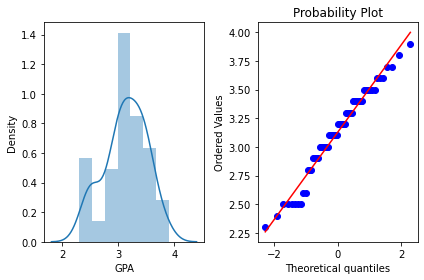

In [37]:
#Distplot & probability plot for GPA :
fig, ax = plt.subplots(1,2)
sns.distplot(df_survey['GPA'],kde=True, ax=ax[0]);
stats.probplot(df_survey['GPA'],plot=ax[1]);
fig.tight_layout()

print('*Skew value for GPA is :', df_survey['GPA'].skew())
print('**Kurtosis value for GPA is :', df_survey['GPA'].kurtosis())

In [38]:
stat, p = shapiro(df_survey['GPA'])
print('stat=%.4f, p=%.4f' % (stat, p))
if p > 0.05:
    print("GPA follows Normal Distribution.")
else:
    print("GPA does not follow Normal Distribution.")

stat=0.9685, p=0.1120
GPA follows Normal Distribution.


C:\Users\ARNAB-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


*Skew value for Salary is : 0.5347008436225946
**Kurtosis value for Salary is : 0.4242636177584149


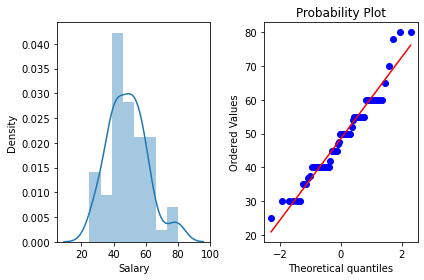

In [39]:
#Distplot & probability plot for Salary :
fig, ax = plt.subplots(1,2)
sns.distplot(df_survey['Salary'],kde=True, ax=ax[0]);
stats.probplot(df_survey['Salary'],plot=ax[1]);
fig.tight_layout()

print('*Skew value for Salary is :', df_survey['Salary'].skew())
print('**Kurtosis value for Salary is :', df_survey['Salary'].kurtosis())

In [40]:
stat, p = shapiro(df_survey['Salary'])
print('stat=%.4f, p=%.4f' % (stat, p))
if p > 0.05:
    print("Salary follows Normal Distribution.")
else:
    print("Salary does not follow Normal Distribution.")

stat=0.9566, p=0.0280
Salary does not follow Normal Distribution.


C:\Users\ARNAB-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


*Skew value for Spending is : 1.5859147414045331
**Kurtosis value for Spending is : 4.559914423727916


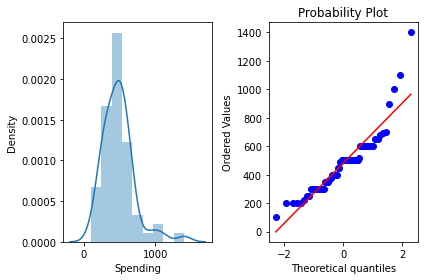

In [41]:
#Distplot & probability plot for Spending :
fig, ax = plt.subplots(1,2)
sns.distplot(df_survey['Spending'],kde=True, ax=ax[0]);
stats.probplot(df_survey['Spending'],plot=ax[1]);
fig.tight_layout()

print('*Skew value for Spending is :', df_survey['Spending'].skew())
print('**Kurtosis value for Spending is :', df_survey['Spending'].kurtosis())

In [42]:
stat, p = shapiro(df_survey['Spending'])
print('stat=%.4f, p=%.4f' % (stat, p))
if p > 0.05:
    print("Spending follows Normal Distribution.")
else:
    print("Spending does not follow Normal Distribution.")

stat=0.8777, p=0.0000
Spending does not follow Normal Distribution.


C:\Users\ARNAB-PC\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


*Skew value for Text Messages is : 1.2958079731054333
**Kurtosis value for Text Messages is : 1.1356852071694052


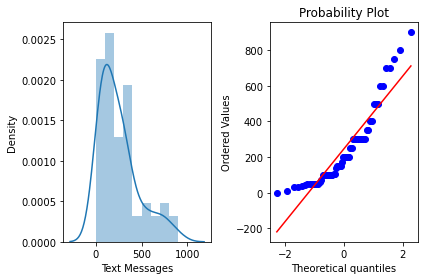

In [43]:
#Distplot & probability plot for Text Messages :
fig, ax = plt.subplots(1,2)
sns.distplot(df_survey['Text Messages'],kde=True, ax=ax[0]);
stats.probplot(df_survey['Text Messages'],plot=ax[1]);
fig.tight_layout()

print('*Skew value for Text Messages is :', df_survey['Text Messages'].skew())
print('**Kurtosis value for Text Messages is :', df_survey['Text Messages'].kurtosis())

In [44]:
stat, p = shapiro(df_survey['Text Messages'])
print('stat=%.4f, p=%.4f' % (stat, p))
if p > 0.05:
    print("Text Messages follows Normal Distribution.")
else:
    print("Text Messages does not follow Normal Distribution.")

stat=0.8594, p=0.0000
Text Messages does not follow Normal Distribution.


#### #This criterion is linked to a Learning Outcome1.8.2 Write a note summarizing your conclusions

GPA follows Normal Distribution.

Salary does not follow Normal Distribution.

Spending does not follow Normal Distribution.

Text Messages does not follow Normal Distribution.

### #Problem 2 :

An important quality characteristic used by the manufacturers of ABC asphalt shingles is the amount of moisture the shingles contain when they are packaged. Customers may feel that they have purchased a product lacking in quality if they find moisture and wet shingles inside the packaging.   In some cases, excessive moisture can cause the granules attached to the shingles for texture and coloring purposes to fall off the shingles resulting in appearance problems. To monitor the amount of moisture present, the company conducts moisture tests. A shingle is weighed and then dried. The shingle is then reweighed, and based on the amount of moisture taken out of the product, the pounds of moisture per 100 square feet is calculated. The company would like to show that the mean moisture content is less than 0.35 pounds per 100 square feet.

The file (A & B shingles.csv) includes 36 measurements (in pounds per 100 square feet) for A shingles and 31 for B shingles.

In [45]:
#Importing CSV file to notebook
df_AB_Shingles = pd.read_csv('A & B shingles.csv')

In [46]:
df_AB_Shingles.head(20).T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
A,0.44,0.61,0.47,0.30,0.15,0.24,0.16,0.20,0.20,0.20,0.26,0.14,0.33,0.13,0.72,0.51,0.28,0.39,0.39,0.25
B,0.14,0.15,0.31,0.16,0.37,0.18,0.42,0.58,0.25,0.41,0.17,0.13,0.23,0.11,0.10,0.19,0.22,0.44,0.11,0.11


In [47]:
df_AB_Shingles.describe().T

,count,mean,std,min,25%,50%,75%,max
A,36.0,0.316667,0.135731,0.13,0.2075,0.29,0.3925,0.72
B,31.0,0.273548,0.137296,0.10,0.1600,0.23,0.4000,0.58


In [48]:
df_AB_Shingles.isnull().sum()

A    0
B    5
dtype: int64

#### 2.1 Do you think there is evidence that means moisture contents in both types of shingles are within the permissible limits? State your conclusions clearly showing all steps.

#The null hypothesis states that the moisture content of sample A and sample B is greater or than equal to the permissible limit, 𝜇 ≥ 0.35, and the alternative hypothesis states that the moisture content of sample A and sample B is less than permissible limit, 𝜇 < 0.35.

Null Hypotheses(HA): 𝜇 ≥ 0.35

Alternative Hypotheses(HA): 𝜇 < 0.35

##Here we need to consider significance level(α) = 0.05 as given in the question.

In [49]:
t_statistic, p_value = ttest_1samp(df_AB_Shingles['A'],0.35,nan_policy='omit')
print('*t_stat value for sample A :',t_statistic)

*t_stat value for sample A : -1.4735046253382782


In [50]:
print ("**One-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis,\nHence, can conclude that the moisture content is less than permissible limit in sample A.')
else:
    print('We have enough evidence to reject the alternative hypothesis in favour of null hypothesis,\nHence, can conclude that the moisture content is greater than permissible limit in sample A.')

**One-sample t-test p-value= 0.07477633144907513
We have enough evidence to reject the alternative hypothesis in favour of null hypothesis,
Hence, can conclude that the moisture content is greater than permissible limit in sample A.


In [51]:
t_statistic, p_value = ttest_1samp(df_AB_Shingles['B'],0.35,nan_policy='omit')
print('*t_stat value for sample B :',t_statistic)

*t_stat value for sample B : -3.1003313069986995


In [52]:
print ("**one-sample t-test p-value=", p_value/2)

alpha_level = 0.05

if (p_value/2) < alpha_level:
    print('We have enough evidence to reject the null hypothesis in favour of alternative hypothesis,\nHence, can conclude that the moisture content is less than permissible limit in sample B.')
else:
    print('We have enough evidence to reject the alternative hypothesis in favour of null hypothesis,\nHence, can conclude that the moisture content is greater than permissible limit in sample B.')

**one-sample t-test p-value= 0.0020904774003191826
We have enough evidence to reject the null hypothesis in favour of alternative hypothesis,
Hence, can conclude that the moisture content is less than permissible limit in sample B.


#### 2.2 Do you think that the population mean for shingles A and B are equal? Form the hypothesis and conduct the test of the hypothesis. What assumption do you need to check before the test for equality of means is performed?

#We have two samples and the sizes for both samples are not the same. The sample size is , n > 30. So we use the t distribution and the t-test statistic for two sample test.

To check the population mean(s) for shingles A and B whether the mean for shingles A and Shingles B are the same, the null hypothesis states that the mean of shingle A to mean of shingle B are the same, μa equals μb. The alternative hypothesis states that the mean are different, μa is not equal to μb.

We can frame the Hypotheses as :

Null Hypotheses(H0): μa = μb 

Alternative Hypotheses(HA): μa ≠  μb

In [53]:
t_statistic, p_value  = ttest_ind(df_AB_Shingles['A'],df_AB_Shingles['B'],nan_policy='omit')
print('*t_stat value:',t_statistic)    

*t_stat value: 1.2896282719661123


In [54]:
print ("*Two-sample t-test p-value=", p_value)

alpha_level = 0.05

if p_value < alpha_level:
    print('**We have enough evidence to reject the null hypothesis in favour of alternative hypothesis.')
    print('***We conclude that mean for shingles A and singles B are not same.')
else:
    print('**We have enough evidence to reject the alternative hypothesis in favour of null hypothesis.')
    print('***We conclude that mean for shingles A and singles B are same.')

*Two-sample t-test p-value= 0.2017496571835306
**We have enough evidence to reject the alternative hypothesis in favour of null hypothesis.
***We conclude that mean for shingles A and singles B are same.


### #Problem 3:

Salary is hypothesized to depend on educational qualification and occupation. To understand the dependency, the salaries of 40 individuals [SalaryData.csv] are collected and each person’s educational qualification and occupation are noted. Educational qualification is at three levels, High school graduate, Bachelor's, and Doctorate. Occupation is at four levels, Administrative and clerical, Sales, Professional or specialty, and Executive or managerial. A different number of observations are in each level of education – occupation combination.

 [Assume that the data follows a normal distribution. In reality, the normality assumption may not always hold if the sample size is small.]

In [55]:
#Importing CSV file to notebook
df_Salary = pd.read_csv('SalaryData.csv')

In [56]:
#Basic view of salary dataframe
df_Salary.head()

,Education,Occupation,Salary
0,Doctorate,Adm-clerical,153197
1,Doctorate,Adm-clerical,115945
2,Doctorate,Adm-clerical,175935
3,Doctorate,Adm-clerical,220754
4,Doctorate,Sales,170769


In [57]:
df_Salary.describe().T

,count,mean,std,min,25%,50%,75%,max
Salary,40.0,162186.875,64860.407506,50103.0,99897.5,169100.0,214440.75,260151.0


In [58]:
#Null Check
df_Salary.isnull().sum()

Education     0
Occupation    0
Salary        0
dtype: int64

#### 1.State the null and the alternate hypothesis for conducting one-way ANOVA for both Education and Occupation individually.

#Null Hypotheses(H0): The mean salary is the same with respect to all the 4 categories of Education.

#Alternative Hypotheses(HA): The mean salary is different in at least one category of Education.

#Null Hypotheses(H0): The mean salary is the same with respect to all the 4 categories of occupation.

#Alternative Hypotheses(HA): The mean salary is different in at least one category of occupation.

#### 2.Perform a one-way ANOVA on Salary with respect to Education. State whether the null hypothesis is accepted or rejected based on the ANOVA results.

In [59]:
print(anova_lm(ols('Salary ~ C(Education)', df_Salary).fit()))

                df        sum_sq       mean_sq         F        PR(>F)
C(Education)   2.0  1.026955e+11  5.134773e+10  30.95628  1.257709e-08
Residual      37.0  6.137256e+10  1.658718e+09       NaN           NaN


##### #Since the p-value is less than the significance level (0.05), we can reject the null hypothesis and conclude that there is a difference in the mean salaries for at-least one category of education.

#### 3.Perform a one-way ANOVA on Salary with respect to Occupation. State whether the Null Hypothesis is accepted or rejected based on the ANOVA results.

In [60]:
print(anova_lm(ols('Salary ~ C(Occupation)', df_Salary).fit()))

                 df        sum_sq       mean_sq         F    PR(>F)
C(Occupation)   3.0  1.125878e+10  3.752928e+09  0.884144  0.458508
Residual       36.0  1.528092e+11  4.244701e+09       NaN       NaN


##### #Since the p-value is greater than the significance level (0.05), we can reject the Alternative Hypothesis and conclude that there is no difference in the mean salaries across the 4 categories of occupation.

#### 4.If the null hypothesis is rejected in either (2) or in (3), find out which class means are significantly different. Interpret the result. (Non-Graded)

#### 5.Perform a two-way ANOVA based on Salary with respect to both Education and Occupation (along with their interaction Education*Occupation). State the null and alternative hypotheses and state your results. How will you interpret this result?

#Null Hypotheses(H0): The mean salary with respect to each education category and occupation is equal.

#Alternative Hypotheses(HA): At least one of the means of salary with respect to each education category and occupation is unequal.

In [61]:
formula = 'Salary ~ C(Education) + C(Occupation)+ C(Education): C(Occupation)'
model = ols(formula, df_Salary).fit()
aov_table = anova_lm(model)
print(aov_table)

                              df        sum_sq       mean_sq          F  \
C(Education)                 2.0  1.026955e+11  5.134773e+10  72.211958   
C(Occupation)                3.0  5.519946e+09  1.839982e+09   2.587626   
C(Education):C(Occupation)   6.0  3.634909e+10  6.058182e+09   8.519815   
Residual                    29.0  2.062102e+10  7.110697e+08        NaN   

                                  PR(>F)  
C(Education)                5.466264e-12  
C(Occupation)               7.211580e-02  
C(Education):C(Occupation)  2.232500e-05  
Residual                             NaN  


##### #Since the p-value is lesser than the significance level(0.05), so we will reject the null hypothesis and conclude that there is significant amount of interaction between the variables(Education and Occupation) and at least one of the means of the salary with respect to each education category and occupation is unequal.

#### 6.Explain the business implications of performing ANOVA for this particular case study.

#From the ANOVA table we can implies:

##From the ANOVA table we can see the p-value for Education is = 5.466264e-12, which is less than 0.05, hence we can reject null-hypothesis and can conclude that the mean salary for different level of education is different. There is a significant effect due to Education.

##From the ANOVA table we can see the p-value for Occupation is = 7.211580e-02, which is greater than 0.05, hence we fail to reject null-hypothesis and can conclude that the mean salary for different level of Occupation is same.There is no significant effect due to Occupation.

##From the ANOVA table we can see the p-value for Education & Occupation is = 2.232500e-05 , which is less than 0.05, hence we  reject null-hypothesis and can conclude that There is an interaction effect between Education & Occupation.